<a href="https://colab.research.google.com/github/sidchaubey/Azure_notebook/blob/master/DNN_hands_on(Sketch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Deep Neural Network (DNN)

# 1.1 Keras basics
<img src="https://drive.google.com/uc?id=1qUd5pI-C3DOFbJs8tGos9OCKZmPnNZYB" width="400px"><br>
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.<br>
It allows for easy and fast prototyping and supports both convolutional networks and recurrent networks.<br>
Its most important features are: user friendliness, modularity, easy extensibility

In this section we will:
* 1.1.1 Build a Single Layer Perceptron
* 1.1.2 Build a Multilayer perceptron

## 1.1.1 Build a Single Layer Perceptron
#### Build a Single Layer Perceptron in Tensorflow
Let's build a single layer perceptron composed by one dense layer.<br>
<img src="https://drive.google.com/uc?id=1cvJa9WfOier2NQIJGHpqDNGn-RlczU1x" width="500px"><br>

In [ ]:
import tensorflow as tf
def one_dense_layer(x, n_in, n_out):
    # n_in: number of inputs, n_out: number of outputs
    # y = sigmoid(W*x + b)
    # W = [1,1]
    # b = 1
    W = tf.ones((n_in, n_out))
    b = tf.ones((1, n_out))
    z = tf.matmul(x,W) + b
    out = tf.sigmoid(z)
    return out

In [ ]:
x_input = tf.constant([[1,2.]], shape=(1,2))

res = one_dense_layer(x_input, n_in=2, n_out=2)
print(res)

tf.Tensor([[0.98201376 0.98201376]], shape=(1, 2), dtype=float32)


#### Build the same Single Layer Perceptron with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 2

# First define the model 
model = Sequential() # model lets us define a linear stack of network layers.

# define our single fully connected network layer
dense_layer = Dense(n_output_nodes, activation='sigmoid',kernel_initializer="Ones",bias_initializer="Ones")

# Add the dense layer to the model
model.add(dense_layer)

## 1.1.2 Build a Multilayer perceptron
Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer.

<img src="https://drive.google.com/uc?id=16Uxs11_l8xl58978mRsxgEtdaTSG5KGb" width="400px"><br>

Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.

In [ ]:
import numpy as np
# Generate dummy data
train_data = np.random.random((1000, 100))
train_labels = np.random.randint(2, size=(1000, 1))
test_data = np.random.random((100, 100))
test_labels = np.random.randint(2, size=(100, 1))

# Build your first model by creating a Sequential object and then adding 3 Dense layers:
units = 32
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(Dense(units, activation='relu', input_dim=100))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=128)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4900
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4870
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4860
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4890
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4930
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4920
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4950
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4960
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4950
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4870
Epoch 11/30
8/8 [======================

# 1.2 Build a Deep Neural Network 
In this section we will:
*  1.2.1 Import the dataset
*  1.2.2 Build a model
*  1.2.3 Train the model 
*  1.2.4 Evaluate the model

## 1.2.1 Import the Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
<img src="https://drive.google.com/uc?id=1bCzydSawhVLUx9F3ee18eIwy0U3eNRMZ" width="600px"><br>


In [ ]:
from sklearn.model_selection import train_test_split
mnist_fashion = tf.keras.datasets.fashion_mnist
(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()

x_learn, x_test = # --fill here-- #

## split learning set into training set and validation set (sklearn provide train_test_split() method)
x_train, x_val, y_train, y_val = # --fill here-- #

num_classes = 10 # Fashion-MNIST classes

print(x_train.shape, x_val.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)


#### Plot some sample from the training set

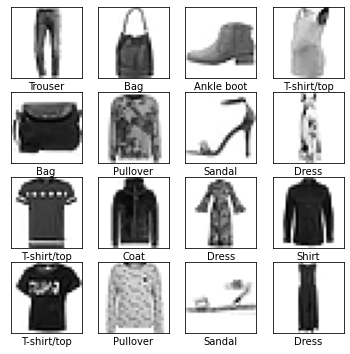

In [ ]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 1.2.2 Build a Model

<img src="https://drive.google.com/uc?id=1siIVKXLL7_YsecqlCQqw_ZI35LhR8XbI" width="400px"><br>

A Deep Neural Network is a neural network composed by many layers and consequently it has a deeper structure. The number of layers in the network depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.
The value produced as output by a neuron is determined by the input the neuron receives and by the activation function. There exists different choices for the activation function. One of the most used is Relu but it depends on the data and on the network architecture.
<br><br>
<img src="https://drive.google.com/uc?id=1Rr_1OJeORL6qmGFplC0E2hFj-KapFGN0" width="600px"><br>


#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [ ]:
from tensorflow.keras.layers import Flatten
# https://keras.io/layers/core/
model = Sequential()
model.add(Flatten())

# Add a Dense layer with 512 neurons, with relu as activation function
# --fill here-- #

# Add a Dense layer with 256 neurons, with relu as activation function
# --fill here-- #

# Add a Dense layer with 128 neurons, with relu as activation function
# --fill here-- #

# Add a Dense layer with 64 neurons, with relu as activation function
# --fill here-- #

# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
# --fill here-- #

When we are building a model there are many design choises that we must operate: the choice of a Loss Function, the Metrics and the Optimizer.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm<br>
Common loss functions are: mean-squared error, cross-entropy, and so on...<br><br>
**Metrics** are used to evaluate a model; common metrics are precision, recall, accuracy, auc,..<br>

The **Optimizer** determines the update rules of the weights. The performance and update speed may heavily vary from optimizer to optimizer; in choosing an optimizer what's important to consider is the network depth, the type of layers and the type of data.<br>
The gifs below give an idea on how different Optimizers work.<br>

<img src="https://drive.google.com/uc?id=151nqtkDry6XPXYJvo3VqCHlwcB9XDXbk" width="460px" align="right">
<img src="https://drive.google.com/uc?id=1UfM-0QruDiOgy8cSxLmZHx3FI4pzLeDQ" width="360px" align="right">

#### Configures the model for training

In [ ]:
# Optimizers    https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses    https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics    https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']

In [ ]:
# Compile the model you created before
# Use:
# -> adam optimizer as optimizer
# -> sparse categorical crossentropy as loss function
# -> accuracy as metric

# --fill here-- #

## 1.2.3 Train the model 
The batch size is a number of samples processed before the model is updated.<br>
The number of epochs is the number of complete passes through the training dataset.

In [ ]:
batch_size = # --fill here-- #
epochs = # --fill here-- #

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value

# --fill here-- #

Epoch 1/50
329/329 [==============================] - 2s 6ms/step - loss: 0.5525 - accuracy: 0.8038 - val_loss: 0.4846 - val_accuracy: 0.8198
Epoch 2/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3781 - accuracy: 0.8615 - val_loss: 0.4017 - val_accuracy: 0.8577
Epoch 3/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3376 - accuracy: 0.8753 - val_loss: 0.3544 - val_accuracy: 0.8736
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3127 - accuracy: 0.8853 - val_loss: 0.3464 - val_accuracy: 0.8713
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.2959 - accuracy: 0.8906 - val_loss: 0.3836 - val_accuracy: 0.8652
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.2829 - accuracy: 0.8934 - val_loss: 0.3821 - val_accuracy: 0.8680
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.2649 - accuracy: 0.8998 - val_loss: 0.3394 - val_accuracy: 0.8786
Epoch 

Training history visualization



In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

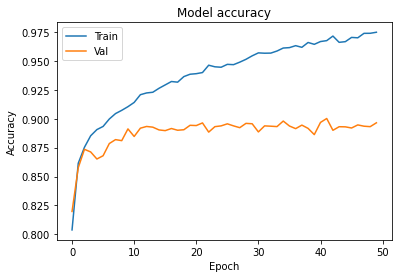

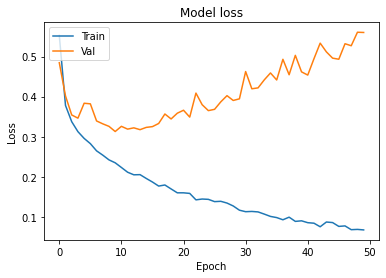

In [ ]:
plot_history(history)

**What could you notice in the loss graph training the model over large number of epochs?**

(Training loss continue to dicrease in a flatten way until to go near 0; validation loss after a while starts to increase significantly -> OVERFITTING)

## 1.2.4 Evaluate the model


In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.6219 - accuracy: 0.8885
Train: 0.974, Test: 0.888


**Try to play with these parameters (loss and optimizers) in order to see how this choice affects the accuracy.**
What do you expect? which is faster?

# 1.3 Overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether).<br>
How to improve generalization of our model on unseen data?<br>
In this section we will:
* 1.3.1 Add weight regularization
* 1.3.2 Dropout
* 1.3.3 Early stopping

## 1.3.1 Add weight regularization
A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".<br>
This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.<br> This cost comes in two flavors:
* L1 regularization
* L2 regularization

In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

Epoch 1/5
329/329 [==============================] - 2s 6ms/step - loss: 0.9381 - accuracy: 0.7827 - val_loss: 0.6711 - val_accuracy: 0.8241
Epoch 2/5
329/329 [==============================] - 2s 6ms/step - loss: 0.5959 - accuracy: 0.8437 - val_loss: 0.5747 - val_accuracy: 0.8449
Epoch 3/5
329/329 [==============================] - 2s 6ms/step - loss: 0.5381 - accuracy: 0.8555 - val_loss: 0.5636 - val_accuracy: 0.8448
Epoch 4/5
329/329 [==============================] - 2s 6ms/step - loss: 0.5067 - accuracy: 0.8624 - val_loss: 0.5133 - val_accuracy: 0.8593
Epoch 5/5
329/329 [==============================] - 2s 6ms/step - loss: 0.4849 - accuracy: 0.8670 - val_loss: 0.4969 - val_accuracy: 0.8617


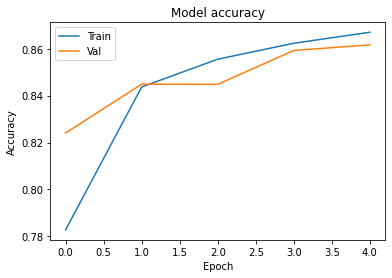

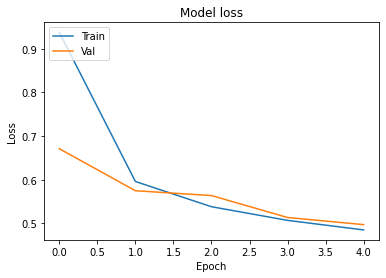

313/313 [==============================] - 1s 3ms/step - loss: 0.5263 - accuracy: 0.8532
Train: 0.874, Test: 0.853


In [ ]:
from  tensorflow.keras import regularizers
# Build the model
model = Sequential()
model.add(Flatten())

# Add a Dense layer with 512 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# --fill here-- #

# Add a Dense layer with 256 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# --fill here-- #

# Add a Dense layer with 128 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# --fill here-- #

# Add a Dense layer with 64 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
# --fill here-- #

# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
# --fill here-- #

# Compile the model you just created using 
# -> adam optimizer as optimizer
# -> sparse categorical crossentropy as loss function
# -> accuracy as metric
# --fill here-- #


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value


# Call the plot_history function to plot the obtained results


# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.3.2 Dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks.<br>
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>
<img src="https://drive.google.com/uc?id=1PcGnn9cdM5JQk2nxRHAFPZAtBj1fNMvk" width="600px"><br>

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

Epoch 1/5
329/329 [==============================] - 2s 6ms/step - loss: 0.6943 - accuracy: 0.7393 - val_loss: 0.4556 - val_accuracy: 0.8350
Epoch 2/5
329/329 [==============================] - 2s 6ms/step - loss: 0.4684 - accuracy: 0.8339 - val_loss: 0.3850 - val_accuracy: 0.8580
Epoch 3/5
329/329 [==============================] - 2s 6ms/step - loss: 0.4190 - accuracy: 0.8487 - val_loss: 0.3804 - val_accuracy: 0.8646
Epoch 4/5
329/329 [==============================] - 2s 6ms/step - loss: 0.3978 - accuracy: 0.8556 - val_loss: 0.3651 - val_accuracy: 0.8678
Epoch 5/5
329/329 [==============================] - 2s 6ms/step - loss: 0.3826 - accuracy: 0.8647 - val_loss: 0.3510 - val_accuracy: 0.8758


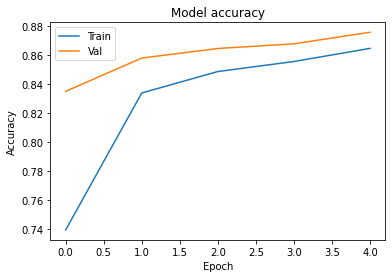

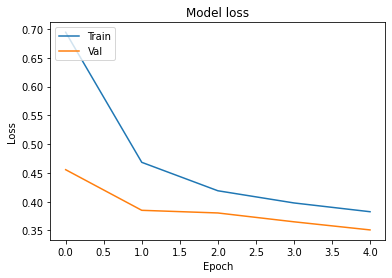

313/313 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8657
Train: 0.887, Test: 0.866


In [ ]:
from tensorflow.keras.layers import Dropout
# Build the model
# --fill here-- #

# Add a Dense layer with 512 neurons, with relu as activation function
# --fill here-- #

# Add a Dropout layer with 0.3 drop probability
# --fill here-- #

# Add a Dense layer with 256 neurons, with relu as activation function
# --fill here-- #

# Add a Dropout layer with 0.3 drop probability
# --fill here-- #

# Add a Dense layer with 128 neurons, with relu as activation function
# --fill here-- #

# Add a Dropout layer with 0.3 drop probability
# --fill here-- #

# Add a Dense layer with 64 neurons, with relu as activation function
# --fill here-- #

# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
# --fill here-- #

# Compile the model you just created using 
# -> adam optimizer as optimizer
# -> sparse categorical crossentropy as loss function
# -> accuracy as metric


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value


# Call the plot_history function to plot the obtained results


# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.3.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>

<img src="https://drive.google.com/uc?id=1prBt0w2oWIviRDjOSRKP2TglDGUr-EGZ" width="400px"><br><br>



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

os.mkdir('my_checkpoint_dir')

# early stopping https://keras.io/callbacks/
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "my_checkpoint_dir/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(checkpoint_path,monitor='val_loss',save_weights_only=True,verbose=1)

Epoch 1/10
322/329 [============================>.] - ETA: 0s - loss: 0.5704 - accuracy: 0.7898
Epoch 00001: saving model to my_checkpoint_dir/cp.ckpt
329/329 [==============================] - 2s 6ms/step - loss: 0.5685 - accuracy: 0.7904 - val_loss: 0.4021 - val_accuracy: 0.8562
Epoch 2/10
322/329 [============================>.] - ETA: 0s - loss: 0.3730 - accuracy: 0.8626
Epoch 00002: saving model to my_checkpoint_dir/cp.ckpt
329/329 [==============================] - 2s 5ms/step - loss: 0.3723 - accuracy: 0.8625 - val_loss: 0.3601 - val_accuracy: 0.8673
Epoch 3/10
318/329 [===========================>..] - ETA: 0s - loss: 0.3287 - accuracy: 0.8786
Epoch 00003: saving model to my_checkpoint_dir/cp.ckpt
329/329 [==============================] - 2s 6ms/step - loss: 0.3280 - accuracy: 0.8791 - val_loss: 0.3414 - val_accuracy: 0.8781
Epoch 4/10
319/329 [============================>.] - ETA: 0s - loss: 0.3046 - accuracy: 0.8876
Epoch 00004: saving model to my_checkpoint_dir/cp.ckpt
329

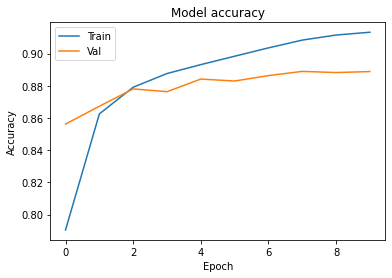

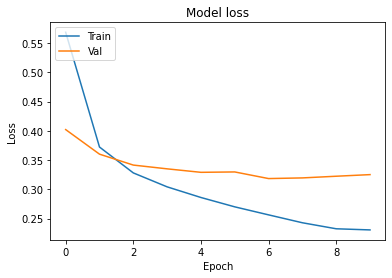

313/313 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8809
Train: 0.920, Test: 0.881


In [ ]:
# Build the model

# Add a Dense layer with 512 neurons, with relu as activation function
# Add a Dense layer with 256 neurons, with relu as activation function
# Add a Dense layer with 128 neurons, with relu as activation function
# Add a Dense layer with 64 neurons, with relu as activation function

# Compile the model you just created using 
# -> adam optimizer as optimizer
# -> sparse categorical crossentropy as loss function
# -> accuracy as metric


# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
# Be careful to also set properly the callbacks parameter list

# This may generate warnings related to saving the state of the optimizer.


# Call the plot_history function to plot the obtained results


# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

#### Load weights
The saved weights can then be loaded and evaluated any time by calling the load_weights() function.


In [ ]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
# link https://www.tensorflow.org/tutorials/keras/save_and_restore_models

checkpoint_path = "my_checkpoint_dir/cp.ckpt"

model.load_weights(checkpoint_path)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8809
Train: 0.920, Test: 0.881
